# Vision models for image interpretation
Some models support image input and can interpret the images. This might be useful to guide the large language model it further decsions about what to do with the image.

In [1]:
from bia_bob import bob

In [2]:
#bob.initialize(model='claude-3-5-sonnet-20240620', vision_model='claude-3-5-sonnet-20240620')
#bob.initialize(model='gemini-1.5-flash', vision_model='gemini-1.5-flash')
#bob.initialize(model='gemini-pro', vision_model='gemini-pro-vision')
#bob.initialize(model='gpt-4o', vision_model='gpt-4o')
bob.initialize(endpoint="azure", model="Phi-3.5-mini-instruct", vision_model="Phi-3.5-vision-instruct")
#bob.initialize(endpoint='ollama', model='deepseek-coder-v2', vision_model='llava:13b')

In [3]:
#from bia_bob._machinery import Context
#Context.verbose = True

First, we load an example image.

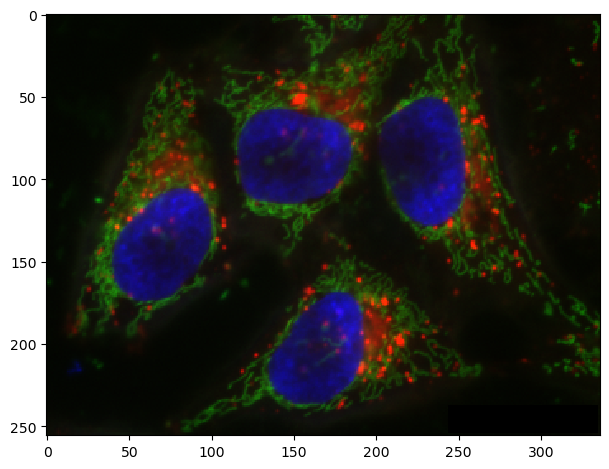

In [4]:
from skimage.io import imread, imshow
image = imread("hela-cells-8bit.tif")[::2,::2]
#image = imread("real_cat.png")

imshow(image)

In [5]:
%%bob image
what's in this image? Answer in one short sentence.

 The image shows several large cells with blue and red emissions, likely indicative of a fluorescence microscopy image.

As the model and the vision-model are not directly connected, only via the chat history, we need to check if the image content was stored in the chat history.

In [6]:
%%bob
What's again shown in the image?

 The image depicts several large cells exhibiting blue and red emissions, characteristic of a fluorescence microscopy setup.

In [7]:
from bia_bob._machinery import Context
Context.chat

[{'role': 'user',
  'content': "image\nwhat's in this image? Answer in one short sentence.\n"},
 {'role': 'assistant',
  'content': ' The image shows several large cells with blue and red emissions, likely indicative of a fluorescence microscopy image.'},
 {'role': 'user',
  'content': "Assume there is an image stored in variable `image`. The image can be described like this:  The image shows several large cells with blue and red emissions, likely indicative of a fluorescence microscopy image.. Just confirm this with 'ok'."},
 {'role': 'assistant', 'content': 'ok'},
 {'role': 'user', 'content': "What's again shown in the image?\n"},
 {'role': 'assistant',
  'content': ' The image depicts several large cells exhibiting blue and red emissions, characteristic of a fluorescence microscopy setup.'}]